Data loaded successfully:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null

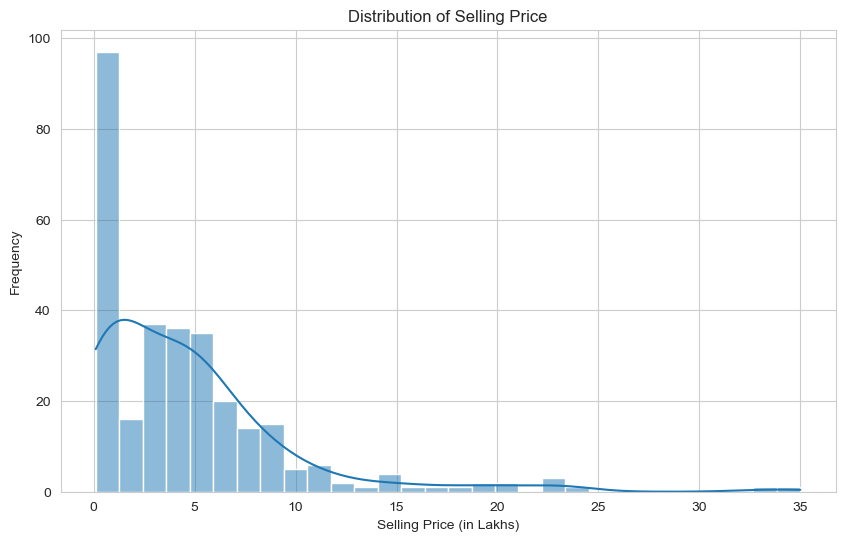

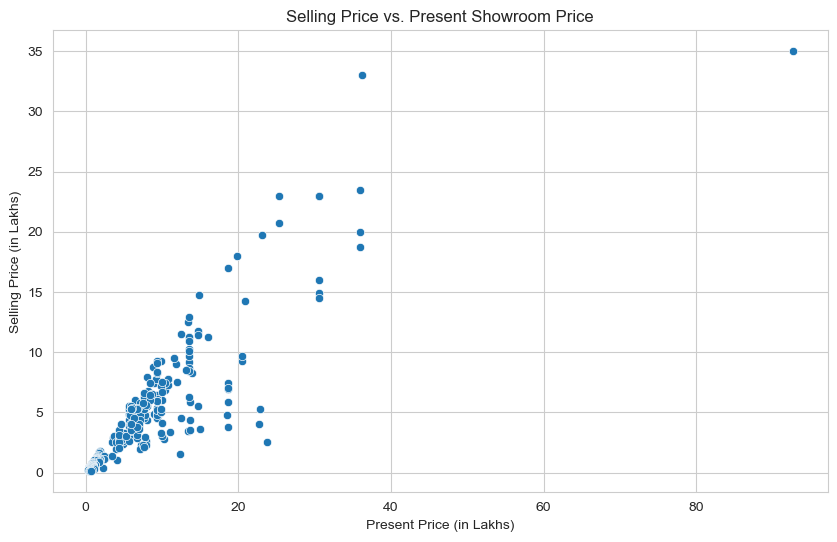

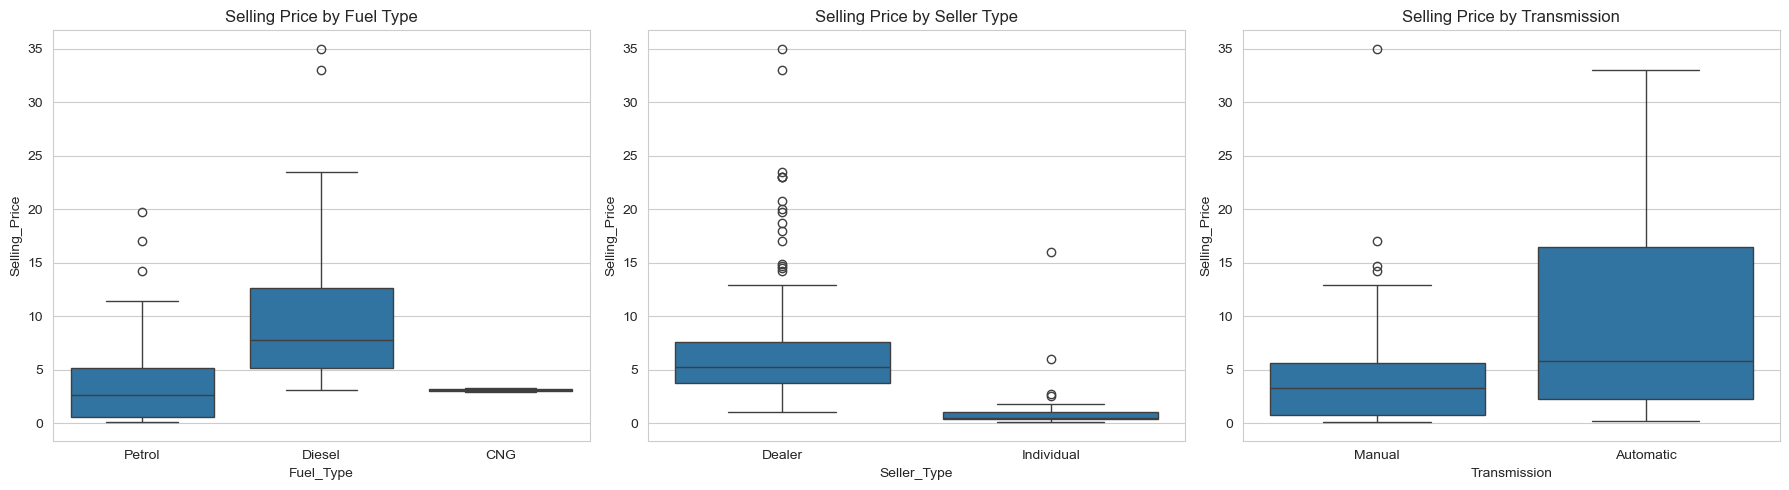

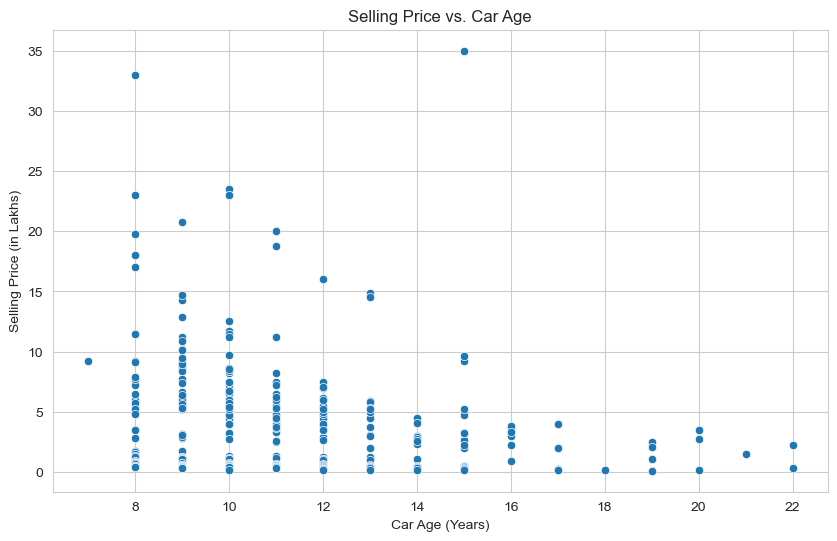

Data after preprocessing and one-hot encoding:
   Selling_Price  Present_Price  Kms_Driven  Owner  Car_Age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0       11             False   
1           4.75           9.54       43000      0       12              True   
2           7.25           9.85        6900      0        8             False   
3           2.85           4.15        5200      0       14             False   
4           4.60           6.87       42450      0       11              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True                   False                 True  
4             False                   False                 True  




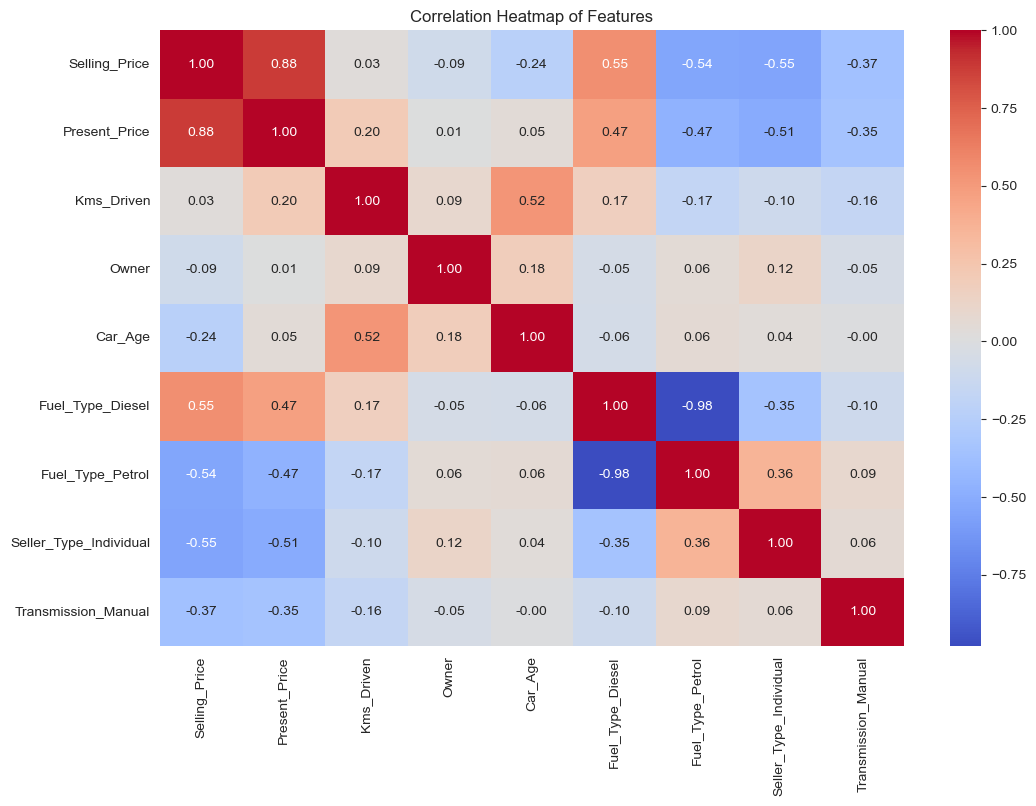

Training data scaled.
Feature columns for the model:
['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']


Training Model 1: Linear Regression...
--- Linear Regression Performance ---
  R-squared (R2): 0.8490
  Mean Squared Error (MSE): 3.4788
  Root Mean Squared Error (RMSE): 1.8652


Training Model 2: Random Forest Regressor...
--- Random Forest Regressor Performance ---
  R-squared (R2): 0.9621
  Mean Squared Error (MSE): 0.8727
  Root Mean Squared Error (RMSE): 0.9342


Generating Model Performance Visualizations...


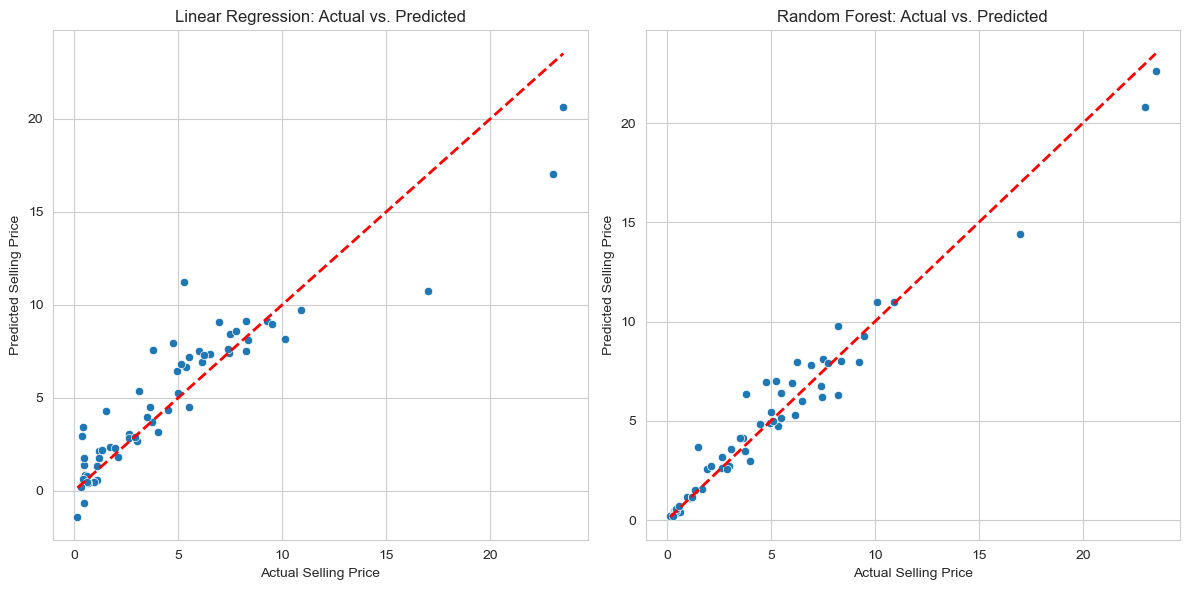

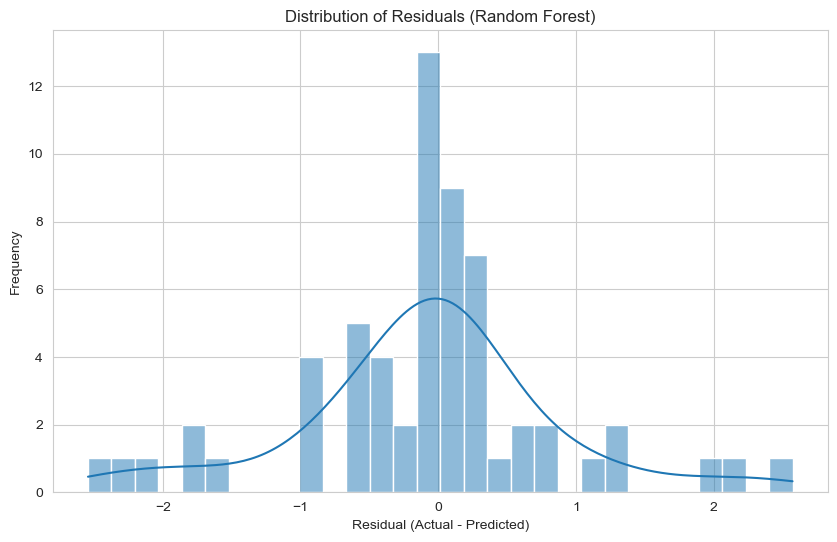


Residuals plot shows errors are centered around zero, which is good!
Comparison Conclusion:
The Random Forest Regressor performs significantly better, as shown by the
higher R2 score, lower MSE/RMSE, and the tighter 'Actual vs. Predicted' plot.

Saving the Random Forest model and the scaler to the 'backend' folder...

Models saved successfully! You can now run the backend server.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# --- 1. Load Data ---
# Load the dataset from the data folder
try:
    df = pd.read_csv('../data/car_data.csv')
except FileNotFoundError:
    print("Error: car_data.csv not found. Make sure it's in the 'data' folder.")
    exit()

print("Data loaded successfully:")
print(df.head())
print("\n" + "="*30 + "\n")

# --- 2. Initial Data Check ---
print("Data Info:")
df.info()
print("\n" + "="*30 + "\n")

print("Checking for missing values:")
print(df.isnull().sum())
print("\n" + "="*30 + "\n")

# --- 3. Data Visualization (EDA) ---
print("Generating Data Visualizations...")

# Plot 1: Distribution of Target Variable (Selling_Price)
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (in Lakhs)')
plt.ylabel('Frequency')
plt.savefig('../frontend/visualization_selling_price_dist.png') # Save for potential use
plt.show()

# Plot 2: Selling Price vs. Present Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Selling Price vs. Present Showroom Price')
plt.xlabel('Present Price (in Lakhs)')
plt.ylabel('Selling Price (in Lakhs)')
plt.savefig('../frontend/visualization_selling_vs_present.png')
plt.show()

# Plot 3: Categorical Features vs. Selling Price
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, ax=axes[0])
axes[0].set_title('Selling Price by Fuel Type')
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df, ax=axes[1])
axes[1].set_title('Selling Price by Seller Type')
sns.boxplot(x='Transmission', y='Selling_Price', data=df, ax=axes[2])
axes[2].set_title('Selling Price by Transmission')
plt.tight_layout()
plt.savefig('../frontend/visualization_categorical_boxplots.png')
plt.show()

# --- 4. Preprocessing & Feature Engineering ---

# Create a new feature 'Car_Age' from 'Year'
current_year = datetime.datetime.now().year
df['Car_Age'] = current_year - df['Year']

# Plot 4: Selling Price vs. Car Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Car_Age', y='Selling_Price', data=df)
plt.title('Selling Price vs. Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Selling Price (in Lakhs)')
plt.savefig('../frontend/visualization_selling_vs_age.png')
plt.show()

# Drop the original 'Year' column and 'Car_Name' (too many unique values)
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

# Convert categorical features into dummy variables (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

print("Data after preprocessing and one-hot encoding:")
print(df.head())
print("\n" + "="*30 + "\n")

# Plot 5: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.savefig('../frontend/visualization_correlation_heatmap.png')
plt.show()

# --- 5. Define Features (X) and Target (y) ---
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# --- 6. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 7. Feature Scaling ---
# We scale the numerical features: Present_Price, Kms_Driven, and Car_Age
# We fit the scaler ONLY on the training data
scaler = StandardScaler()
numerical_features = ['Present_Price', 'Kms_Driven', 'Car_Age']

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("Training data scaled.")
print("Feature columns for the model:")
print(X_train.columns.tolist())
print("\n" + "="*30 + "\n")

# --- 8. Model Training & Comparison ---

# Helper function to print metrics
def print_metrics(model_name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"--- {model_name} Performance ---")
    print(f"  R-squared (R2): {r2:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("\n")

# Model 1: Linear Regression
print("Training Model 1: Linear Regression...")
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print_metrics("Linear Regression", y_test, y_pred_lr)

# Model 2: Random Forest Regressor
print("Training Model 2: Random Forest Regressor...")
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # Use all processors
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print_metrics("Random Forest Regressor", y_test, y_pred_rf)

# --- 9. Model Performance Visualization ---
print("Generating Model Performance Visualizations...")

# Plot 6: Compare Model Predictions (Actual vs. Predicted)
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')

# Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')

plt.tight_layout()
plt.savefig('../frontend/visualization_model_comparison.png')
plt.show()

# Plot 7: Residuals Plot for the Best Model (Random Forest)
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.savefig('../frontend/visualization_residuals.png')
plt.show()
print("\nResiduals plot shows errors are centered around zero, which is good!")

# --- 10. Conclusion & Saving the Best Model ---
print("Comparison Conclusion:")
print("The Random Forest Regressor performs significantly better, as shown by the")
print("higher R2 score, lower MSE/RMSE, and the tighter 'Actual vs. Predicted' plot.")
print("\nSaving the Random Forest model and the scaler to the 'backend' folder...")

# Save the scaler
with open('../backend/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the Random Forest model
with open('../backend/model.pkl', 'wb') as f:
    pickle.dump(rf, f)

print("\nModels saved successfully! You can now run the backend server.")